## Pull Covid-19 data from an excel spreadsheet

### Inspired by:
#### [https://www.twilio.com/blog/2017/02/an-easy-way-to-read-and-write-to-a-google-spreadsheet-in-python.html](https://www.twilio.com/blog/2017/02/an-easy-way-to-read-and-write-to-a-google-spreadsheet-in-python.html)
#### and
#### [https://code.sololearn.com/c4gmt97Se5f9/?ref=app](https://code.sololearn.com/c4gmt97Se5f9/?ref=app)

In [25]:
def convert_to_int(list):
    return [int(item) for item in list]

def convert_string_to_np_date(string):
    split = string.split('/')
    
    first = split[1]
    zero = split[0]
    
    if len(split[1]) == 1:
        first = '0' + split[1]
        
    if len(split[0]) == 1:
        zero = '0' + split[0]
    
    return split[2] + '-' + first + '-' + zero

def convert_string_to_excel_date(string):
    split = str(string).split('-')
    
    second = split[2]
    first = split[1]
    
    if second[0] == '0':
        second = second[1]
        
    if first[0] == '0':
        first = first[1]
    
    return second + '/' + first + '/' + split[0]

# gspread and oauth2client are necessary
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Use creds to create a client to interact with the Google Drive API
scope = [
    'https://spreadsheets.google.com/feeds',
    'https://www.googleapis.com/auth/spreadsheets',
    "https://www.googleapis.com/auth/drive.file",
    "https://www.googleapis.com/auth/drive",
]

creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

sheet = client.open('Denmark Covid-19 Data').get_worksheet(0)

date_full_column = sheet.col_values(1)   # Column A
i_full_column = sheet.col_values(3)      # Column C

start_date = '21/10/2021' # Included - must be in Google Sheets
end_date = '22/11/2021'   # Included - must be in Google Sheets

start_index = date_full_column.index(start_date)
end_index = date_full_column.index(end_date)

# end_index + 1 to include the end date
date_column = date_full_column[start_index : end_index + 1]
i_column = convert_to_int(i_full_column[start_index : end_index + 1])

dates = [
    {
        'percentage': 0.85,
        're': 1.025,
        'peak': 209,
        'color': '#4BE21D',
    },
    {
        'percentage': 0.852,
        're': 1.011,
        'peak': 55,
        'color': '#F22828',
    },
    {
        'percentage': 0.853,
        'peak': 9,
        're': 1.004,
        'color': '#3124E9',
    },
    {
        'percentage': 0.854,
        're': 0.987,
        'color': '#BC20A7',
    },
]

<IPython.core.display.Javascript object>


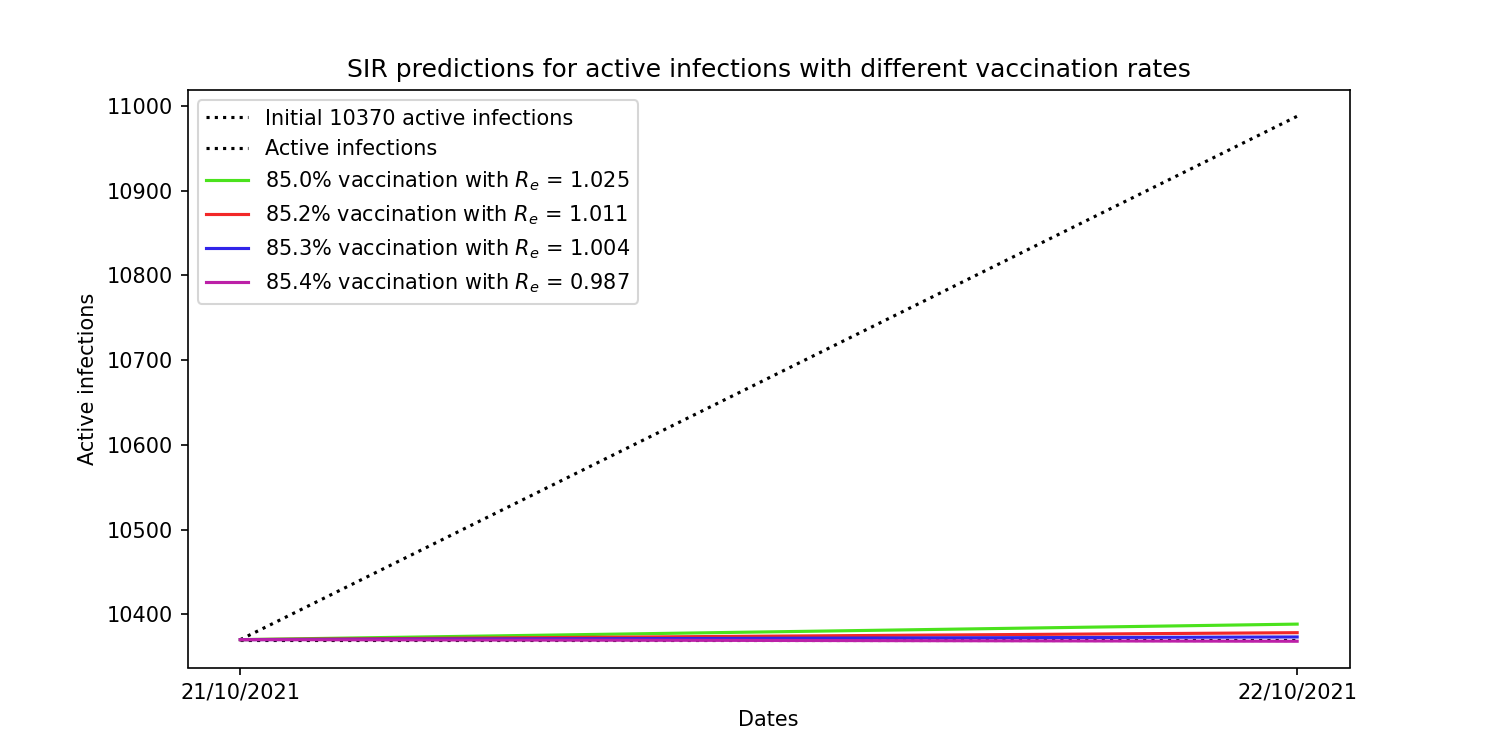

Alfa = 0.07142857142857142 , Beta = 0.48884230280504637 0.04728098946219549
y = 0.047281x + 9.325264
R0 =  6.843792239270649
Re =  1.661933852470737
HIT with R0 =  0.85388218037043
871858.9500000002
5822763
0.48884230280504637
0.07142857142857142
Re SIR =  1.0247405768959956
Alfa = 0.07142857142857142 , Beta = 0.48884230280504637 0.04728098946219549
y = 0.047281x + 9.325264
R0 =  6.843792239270649
Re =  1.661933852470737
HIT with R0 =  0.85388218037043
860234.1639999999
5822763
0.48884230280504637
0.07142857142857142
Re SIR =  1.0110773692040487
Alfa = 0.07142857142857142 , Beta = 0.48884230280504637 0.04728098946219549
y = 0.047281x + 9.325264
R0 =  6.843792239270649
Re =  1.661933852470737
HIT with R0 =  0.85388218037043
854421.7709999997
5822763
0.48884230280504637
0.07142857142857142
Re SIR =  1.0042457653580752
Alfa = 0.07142857142857142 , Beta = 0.48884230280504637 0.04728098946219549
y = 0.047281x + 9.325264
R0 =  6.843792239270649
Re =  1.661933852470737
HIT with R0 =  0.853882

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

N = 5822763
SSI_vaccinated = 4398404 # until 21/10/2021 (around 75%)

plt.figure(figsize = (10, 5))
plt.title('SIR predictions for active infections with different vaccination rates')

for date_index in range(len(dates)):
    date_property = dates[date_index]


    SIR_percent = date_property['percentage']
    SIR_vaccinated = SIR_percent * (N - i_column[0]) #


    x = np.array(range(len(i_column)))
    y = np.log(i_column)

    p = np.polyfit(x, y, 1)

    m = p[0]  # Slope
    b = p[1]  # Intersection at x = 0

    alfa = 1 / 14
    # N / S * (alpha + m)
    # N = 600
    # S = 600
    # vaccination - 0%
    # N / S = 1
    # beta = 1 * beta = beta
    
    
    # N = 600
    # S = 100
    # N / S = 6
    # vaccination ~ 80%
    # beta = 6 * beta
    beta = (N / (N - SSI_vaccinated - i_column[0])) * (alfa + m)

    print('Alfa =', alfa, ', Beta =', beta, m)
    print("y = %fx + %f" % (m,b))

    # x_fit = np.arange(0, len(i_column), 1)
    # y_fit = np.polyval(p, x_fit)

    # plt.figure(figsize = (7, 4))

    # plt.title('Best fit line')

    # plt.plot(date_column, y, ':o', label = 'Active Infections', color = '#9F4A00')
    # plt.plot(date_column, y_fit, '-', label = "Best fit with y = %fx + %f" % (m,b), color = '#FF7F0E')
    # xticks = [date_column[0], date_column[int(len(date_column) / 2)], date_column[-1]]
    # plt.legend()
    # plt.xticks(xticks, visible = True, rotation = "horizontal")

    # plt.xlabel('Dates')
    # plt.ylabel('ln Active infections')

    # plt.show()

    # 5000 N
    # 2000 V

    # 5000 - 2000 - 100 = 2900 S
    # 100 I
    # 5000 - 2900 - 100 = 2000 R


    # 5000 - 2000 = 3000 S
    # 100 I
    # 2000 - 100 = 1900 R


    # 5000 - 100 = 4900 S - 2000V
    # 100 I
    # 0 R + 2000 V

    sir_s = N - SIR_vaccinated - i_column[0]
    sir_i = i_column[0]
    sir_r = SIR_vaccinated

    S_test =  N - SSI_vaccinated - i_column[0]

    # More infected -> bigger beta
    print("R0 = ", beta / alfa)
    print("Re = ", (S_test / N) * (beta / alfa))
    print("HIT with R0 = ", 1 - (1 / (beta / alfa)))

    print(sir_s)
    print(N)
    print(beta)
    print(alfa)
    print("Re SIR = ", (sir_s / N) * (beta / alfa))


    sir_s_list = [sir_s]
    sir_i_list = [sir_i]
    sir_r_list = [sir_r]

    final_date = '22/10/2021' # Included - can be not in the Google Sheets. Default - 3/12/2021

    # https://stackoverflow.com/questions/12137277/how-can-i-make-a-python-numpy-arange-of-datetime
    final_date_column_np = np.arange(np.datetime64(convert_string_to_np_date(start_date)),
                           np.datetime64(convert_string_to_np_date(final_date)) + np.timedelta64(1, 'D'))

    final_date_column = []

    for date in final_date_column_np:
        final_date_column.append(convert_string_to_excel_date(date))

    period = len(final_date_column)

    for index in range(period - 1): # Length - 1 because there are initial values
        sir_s_rate = -1 * sir_s * sir_i * beta / N
        sir_i_rate = (sir_s * sir_i * beta / N) - (sir_i * alfa)
        sir_r_rate = sir_i * alfa

        sir_s += sir_s_rate
        sir_i += sir_i_rate
        sir_r += sir_r_rate

        sir_s_list.append(sir_s)
        sir_i_list.append(sir_i)
        sir_r_list.append(sir_r)

    new_i_column = i_column.copy()
    
    initial_points = []

    # 2    0 1
    # 4    0 1 2 3

    for i in range(period):
        initial_points.append(10370)
        if i >= len(new_i_column):
            new_i_column.append(None)


#     xticks = [start_date, end_date, final_date]
    xticks = [start_date, final_date]
    
    if (date_index == 0):
        plt.plot(final_date_column, initial_points, ':', label = 'Initial 10370 active infections', color = '#000000')
        
    if (date_index == 3):
        label = '85.4% vaccination with '
        plt.plot(final_date_column, sir_i_list, '-', label = label + r"$R_e$" + " = " + str(date_property['re']) + "", color = date_property['color'])
    else:
        label = str(date_property['percentage'] * 100) + '% vaccination with '
        plt.plot(final_date_column, sir_i_list, '-', label = label + r"$R_e$" + " = " + str(date_property['re']) + "", color = date_property['color'])

plt.legend()

plt.ylabel('Active infections')
plt.xlabel('Dates')

plt.xticks(xticks, visible = True, rotation = "horizontal")
plt.savefig('./Images/prediction_combined.png')

plt.show()